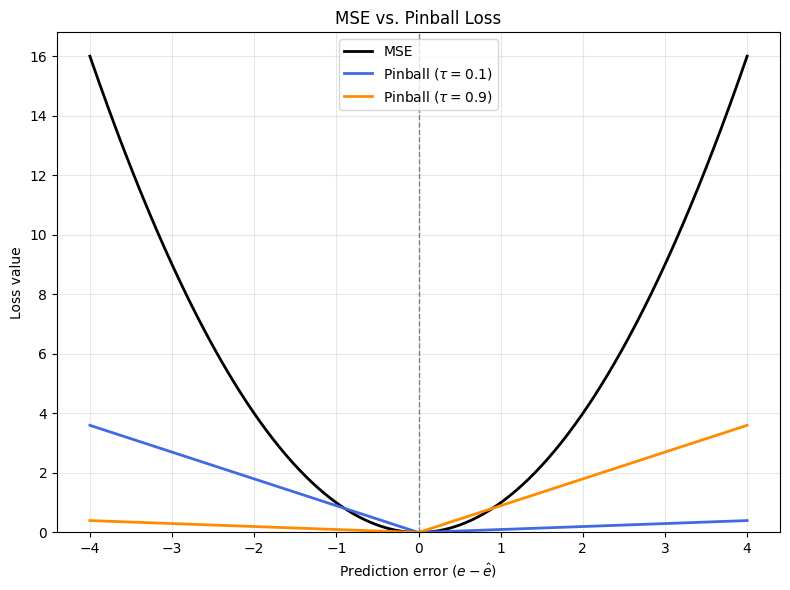

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1. Define error grid (e - ê) over which to evaluate each loss
# ------------------------------------------------------------------
errors = np.linspace(-4, 4, 500)        # prediction error values

# ------------------------------------------------------------------
# 2. Loss functions
# ------------------------------------------------------------------
def mse_loss(e):
    """Mean Squared Error."""
    return e ** 2

def pinball_loss(e, tau):
    """Pinball (quantile) loss for quantile level tau."""
    return np.where(e >= 0, tau * e, (1 - tau) * (-e))

# Evaluate losses
mse_values      = mse_loss(errors)
pinball_tau_01  = pinball_loss(errors, tau=0.1)
pinball_tau_09  = pinball_loss(errors, tau=0.9)

# ------------------------------------------------------------------
# 3. Plotting
# ------------------------------------------------------------------
plt.figure(figsize=(8, 6))

# Plot MSE
plt.plot(errors, mse_values, label="MSE", color="black", linewidth=2)

# Plot pinball losses
plt.plot(errors, pinball_tau_01,
         label=r"Pinball $(\tau=0.1)$", color="royalblue", linewidth=2)
plt.plot(errors, pinball_tau_09,
         label=r"Pinball $(\tau=0.9)$", color="darkorange", linewidth=2)

# Aesthetics
plt.title("MSE vs. Pinball Loss")
plt.xlabel(r"Prediction error $(e - \hat{e})$")
plt.ylabel("Loss value")
plt.axvline(0, color="gray", linestyle="--", linewidth=1)  # zero-error marker
plt.ylim(bottom=0)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# ------------------------------------------------------------------
# 4. Display
# ------------------------------------------------------------------
plt.show()


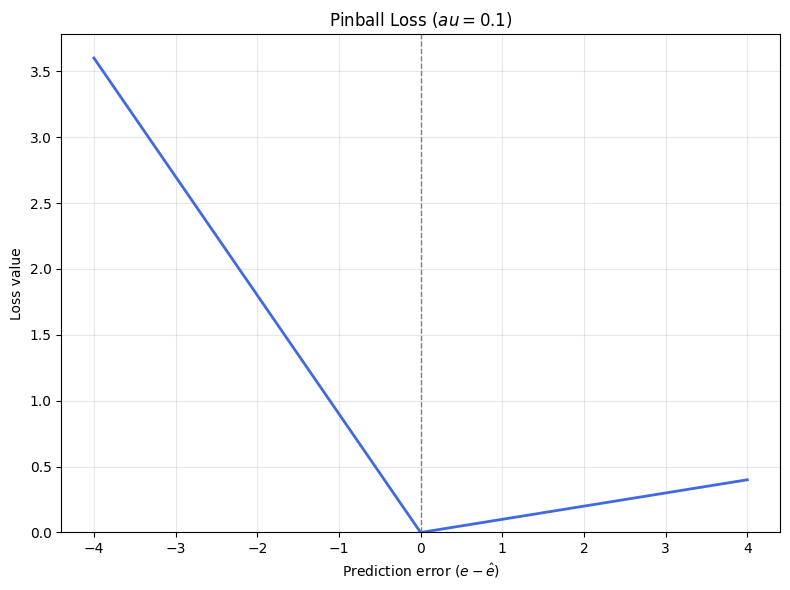

In [4]:
plt.figure(figsize=(8, 6))

# Plot MSE
plt.plot(errors, pinball_tau_01,
         label=r"Pinball $(\tau=0.1)$", color="royalblue", linewidth=2)

# Aesthetics
plt.title("Pinball Loss ($\tau=0.1$)")
plt.xlabel(r"Prediction error $(e - \hat{e})$")
plt.ylabel("Loss value")
plt.axvline(0, color="gray", linestyle="--", linewidth=1)  # zero-error marker
plt.ylim(bottom=0)
plt.grid(alpha=0.3)
#plt.legend()
plt.tight_layout()

# ------------------------------------------------------------------
# 4. Display
# ------------------------------------------------------------------
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))

# Plot MSE
plt.plot(errors, mse_values, label="MSE", color="black", linewidth=2)

# Aesthetics
plt.title("MSE")
plt.xlabel(r"Prediction error $(e - \hat{e})$")
plt.ylabel("Loss value")
plt.axvline(0, color="gray", linestyle="--", linewidth=1)  # zero-error marker
plt.ylim(bottom=0)
plt.grid(alpha=0.3)
#plt.legend()
plt.tight_layout()

# ------------------------------------------------------------------
# 4. Display
# ------------------------------------------------------------------
plt.show()